<a href="https://colab.research.google.com/github/hybyun0121/gnn/blob/main/various_matrix_representations_of_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Graph에서 다양한 행렬 표현
행렬의 elements들에 대한 자세한 설명은 
[Notion_link](https://www.notion.so/Algebra-Representations-of-Graphs-e511330048874e74b6b55678c1767fad)에 있습니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Adjacency matrix를 하나 정의하겠습니다.
Adj = np.array([[0,1,1,1],
                [1,0,1,1],
                [1,1,0,0],
                [1,1,0,0]])

# 뒤에 수식 표현을 위해 간단한 문제 하나 저장해 두겠습니다.
A = Adj.copy()

In [ ]:
# node index
nodes = list(range(len(Adj)))
nodes

[0, 1, 2, 3]

In [ ]:
def adj2edge(adj):
    coo = coo_matrix(adj)
    head = coo.row
    tail = coo.col
    edge = []
    for i in range(len(head)):
        edge.append((head[i], tail[i]))
    return edge

# edges
edges = adj2edge(Adj)
print(edges)

[(0, 1), (0, 2), (0, 3), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (3, 0), (3, 1)]


In [ ]:
def node_degree(adj):
    num_nodes = len(adj)
    d_v = np.eye(N=num_nodes)

    for i in range(len(adj)):
        d_v[i][i] = np.sum(adj[i][:])
    return d_v

# Degree matrix
D = node_degree(Adj)
print(D)

[[3. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 2.]]


In [ ]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

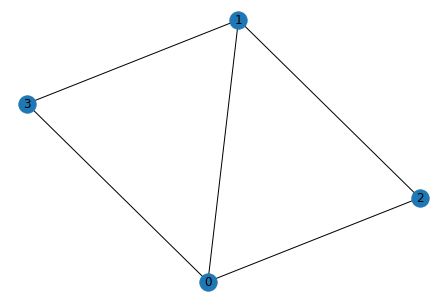

In [ ]:
# 출력할때 마다 모양이 조금씩 달라집니다.
# 하지만 당연히도 노드간의 연결성은 변하지 않습니다.
nx.draw(G, with_labels=True)

### Graph를 표현하는 다양한 Matirx

In [ ]:
# Adjacency matrix
A

array([[0, 1, 1, 1],
       [1, 0, 1, 1],
       [1, 1, 0, 0],
       [1, 1, 0, 0]])

In [ ]:
# Degree matrix
D

array([[3., 0., 0., 0.],
       [0., 3., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 2.]])

In [ ]:
# Laplacian matrix
Lap = D - A
L = Lap.copy()

In [ ]:
# Symmetric normalized Laplacian
L_sym = (D**(-0.5))*L*(D**(-0.5))
L_sym = np.nan_to_num(L_sym, nan=0., neginf=-np.inf)
L_sym

array([[  1., -inf, -inf, -inf],
       [-inf,   1., -inf, -inf],
       [-inf, -inf,   1.,   0.],
       [-inf, -inf,   0.,   1.]])

In [ ]:
# Random walk normlized Laplacian
L_rw = (D**-1)*L
L_rw = np.nan_to_num(L_rw, nan=0., neginf=-np.inf)
L_rw

array([[  1., -inf, -inf, -inf],
       [-inf,   1., -inf, -inf],
       [-inf, -inf,   1.,   0.],
       [-inf, -inf,   0.,   1.]])